In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#2025/09/20 - da lettura crocodile inox_VC2
#primo file per lettura dati presi oggi

In [3]:
%reset

In [4]:
%qtconsole

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

# def comma_to_float(s):
#     return float(s.replace(',', '.'))

# def read_chr(fn):
#     """ Read data from a crocodile file.
    
#     Accetta una stringa, sostituisce ',' con '.' e converte in float
#     """

#     data = np.genfromtxt(
#         fn, #'mould inox n1.txt',
#         delimiter='\t',
#         skip_header=1,
#         usecols=(2, 3),
#         converters={2: comma_to_float, 3: comma_to_float},
#         dtype=float,
#         encoding='latin1',unpack=True
#     )

#     return data

# TEST

from pyProfile.profile_class import read_chr

infolder = Path(r"..\..\Chrocodile")
x,z = read_chr(infolder / r"20250920_SS\01_LMR08SS02.txt")



g:\my drive\progetti\pysurf\packaging_project\install_test\pyxsurf\source\pyProfile\profile_class.py:961: DeprecationWarning: invalid escape sequence '\m'
  """Read a set of profile file(s) to a plist. By default, files are split on blocks with spaces or changes in monotony.


AttributeError: module 'dataIO' has no attribute 'outliers'

In [ ]:
# from pyProfile.profile_class import Profile
# from pyProfile.profile_class import Plist
# import os

# files = [infolder / r"20250920_SS\%02i_LMR08SS02.txt"%i for i in range(1,11)]
# pp = Plist([Profile(*read_chr(f), units =['mm','um'], name=os.path.basename(f)) for f in files])

In [ ]:
from pyProfile.profile_class import Profile
from pyProfile.profile_class import Plist
import os

files = [infolder / (r"20250920_SS\%02i_LMR08SS02.txt"%i) for i in range(1,11)]
pp = Plist([Profile(*read_chr(f), units =['$\mu$m','nm'], scale=(1000.,1000.),name=os.path.basename(f)) for f in files])

<>:6: DeprecationWarning: invalid escape sequence '\m'


In [ ]:
pp = pp.rebin()  #remove duplicates by doing average over same x


In [ ]:
# 50 um step -> 20 points/mm = 0.02 um^-1
# 60 mm -> 1200 points
# 60 mm -> 0.017 points/mm =17 e-6 um^-1

In [ ]:
# pp.level(2).psd().plot(type='all')

In [ ]:
# pavg = np.sum(pp.level(2).psd())/len(pp)
# pavg.name = 'average'
# pavg.units=['$\mu$m','nm']
# pavg=pavg*(0.001,1000)
# pavg.plot()

In [ ]:
plt.close('all')

g:\my drive\progetti\pysurf\packaging_project\install_test\pyxsurf\source\pyProfile\psd.py:314: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=0)


<Figure size 640x480 with 0 Axes>

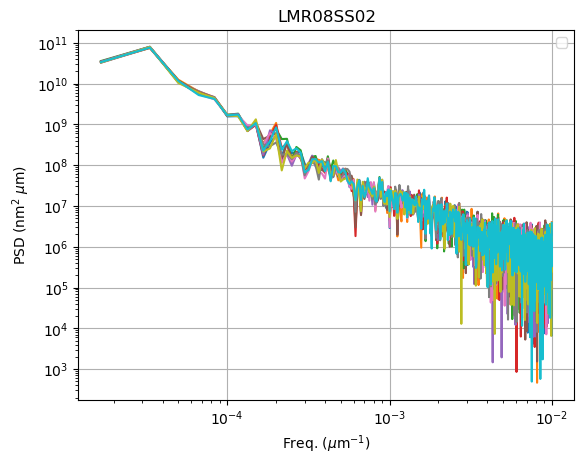

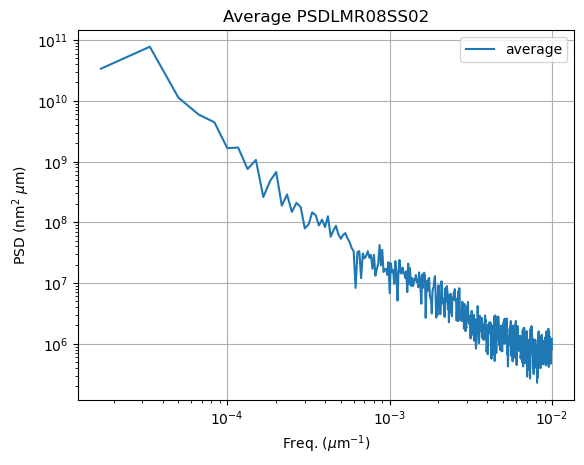

In [ ]:
from dataIO.fn_add_subfix import fn_add_subfix

def process_list(files, outname=None):
    """ Do the full processing of a list of files.
    Returns the Plist object with all profiles (duplicate points removed)."""
    pp = Plist([Profile(*read_chr(f), 
                        units =['$\mu$m','nm'], 
                        name=os.path.basename(f),
                        scale = (1000,1000)) for f in files])
    pp = pp.rebin() 
    # pp.units=['$\mu$m','nm']
    # pp = Plist([ppp*(0.001,1000) for ppp in pp])  #convert to um,mm
    
    plt.figure()
    pp.level(2).psd().plot(type='all')
    plt.title(os.path.basename(outname) if outname else '')
    if outname:
        plt.savefig(fn_add_subfix(outname,'_psd_all','.png'))
    
    plt.figure()
    pavg = np.sum(pp.level(2).psd())/len(pp)  #average of PSDs
    pavg.name = 'average'

    pavg.plot()
    plt.title('Average PSD' + os.path.basename(outname) if outname else '')
    if outname:
        plt.savefig(fn_add_subfix(outname,'_avg','.png'))   
        pavg.save(fn_add_subfix(outname,'_avg','.csv'))
    
    plt.show()
    return pp
    
outfolder = r'results\20250920_SS'
pp = process_list([infolder / (r"20250920_SS\%02i_LMR08SS02.txt"%i) for i in range(1,11)],outname=os.path.join(outfolder,'LMR08SS02'))



In [ ]:
from dataIO.fn_add_subfix import fn_add_subfix

def profiles_read(files, outname=None):
    
    pp = Plist([Profile(*read_chr(f), 
                        units =['$\mu$m','nm'], 
                        name=os.path.basename(f),
                        scale = (1000,1000)) for f in files])
    pp = pp.rebin() 
    # pp.units=['$\mu$m','nm']
    # pp = Plist([ppp*(0.001,1000) for ppp in pp])  #convert to um,mm
    
    plt.figure()
    pp.level(2).plot(type='all')
    plt.title(os.path.basename(outname) if outname else '')
    if outname:
        plt.savefig(fn_add_subfix(outname,'_profiles_all','.png'))    
    
    plt.figure()    
    pp.level(2).plot(type='grid')
    plt.title(os.path.basename(outname) if outname else '')
    if outname:
        plt.savefig(fn_add_subfix(outname,'_profiles_grid','.png')) 
    plt.tight_layout()
    
    return pp

def profiles_avg(pp, outname=None):
    
    plt.figure()
    pavg = np.sum(pp.level(4).psd())/len(pp)
    pavg.level(4).plot()
    pavg.name = 'average'
    plt.title(os.path.basename(outname) if outname else '')
    if outname:
        plt.savefig(fn_add_subfix(outname,'_avg','.png'))      
    return pavg

def profiles_avg_psd(pavg, outname=None):
    
    pavg.plot()
    plt.title('Average PSD' + os.path.basename(outname) if outname else '')
    if outname:
        plt.savefig(fn_add_subfix(outname,'_avg','.png'))   
        pavg.save(fn_add_subfix(outname,'_avg','.csv'))
        
    return pavg
    
# outfolder = r'results\20250920_SS'
# pp = process_list([infolder / (r"20250920_SS\%02i_LMR08SS02.txt"%i) for i in range(1,11)],
#              outname=os.path.join(outfolder,'LMR08SS02'))

<Figure size 640x480 with 0 Axes>

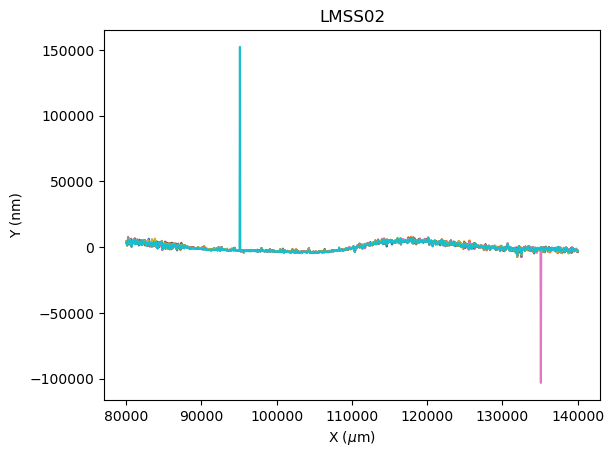

<Figure size 640x480 with 0 Axes>

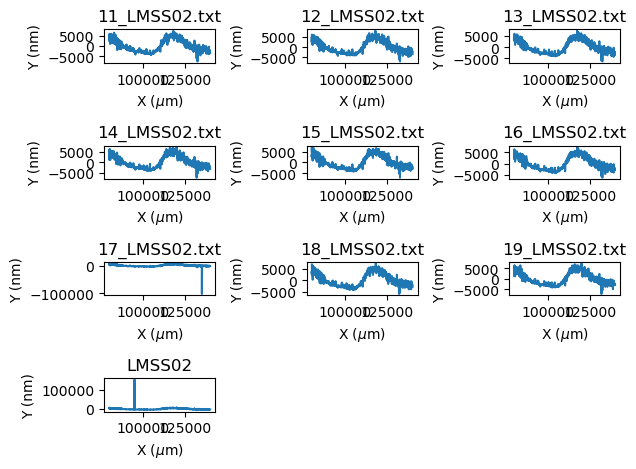

NameError: name 'outliers' is not defined

In [ ]:
outfolder = r'results\20250920_SS'
outname=os.path.join(outfolder,'LMSS02')
pp = profiles_read([infolder / (r"20250920_SS\%02i_LMSS02.txt"%i) for i in range(11,21)],outname=outname)
plt.show()

#pp = Plist (pp[:6]+pp[7:9]) #remove bad profiles
pp = pp.level(2).remove_outliers(itmax=2,correct=True)
plt.show()

plt.figure()
pavg = np.sum(pp.level(4).psd())/len(pp)
pavg.name = 'average'
pavg.plot()
plt.title('Average PSD' + os.path.basename(outname) if outname else '')
plt.show()
if outname:
    plt.savefig(fn_add_subfix(outname,'_avg','.png'))   
    pavg.save(fn_add_subfix(outname,'_avg','.csv'))

In [ ]:
outfolder = r'results\20250920_SS'
outname=os.path.join(outfolder,'LMSS01')

pp = profiles_read([infolder / (r"20250920_SS\%02i_LMSS01.txt"%i) for i in range(24,28)], outname = outname)
pp = pp.level(2).remove_outliers(itmax=2,correct=True)

plt.figure()
pp.plot(type='all')
p = np.sum(pp)/len(pp)
p.plot(label='average')
plt.title(os.path.basename(outname) if outname else '')

plt.figure()
pavg = p.psd()
pavg.name = 'average PSD'
pavg.plot()
plt.title('Average PSD ' + os.path.basename(outname) if outname else '')
if outname:
    plt.savefig(fn_add_subfix(outname,'_psdavg','.png'))   
    pavg.save(fn_add_subfix(outname,'_psdavg','.csv'))

plt.show()

In [ ]:
# load data in a profile object 


p = pp[0] # Profile(x,z, units =['mm','um'], name='Mould Inox n2')
p.name = 'Mould Inox n2'

# alternatively, create object directly with file name:
#
# p = Profile('mould inox n1.txt',units =['mm','um'], name='Mould Inox n1',
#         skip_header=1,
#         usecols=(2, 3),
#         converters={2: comma_to_float, 3: comma_to_float},
#         encoding='latin1')

p.plot()
plt.grid(True)
plt.show()

In [ ]:
p2 = p.level(8) #this is simply removing a second order Legendre
p2.plot()
plt.show()

In [ ]:
plt.figure(3)
p2.psd().plot() #this is a psd object

In [ ]:
%qtconsole

In [ ]:
infolder = Path(r"..\..\MFT\20250630_slumpingRun08")
fn = '01_SS201_center.dat'

from pySurf.data2D_class import Data2D
from pySurf.readers.instrumentReader import matrixdat_reader

d = Data2D(file = infolder / fn, reader = matrixdat_reader )

In [ ]:
d.plot()

In [ ]:
d.psd().plot()

In [ ]:
d.psd().avgpsd().plot()

In [ ]:
%qtconsole